In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
starch_pd = pd.read_excel('starch_data/starch.xlsx',header=0)
starch_pd.head()

,Real Names,Fake Names,Flavor,Appearance,Texture,TOTAL,Price,Date,Temp,DoW,Comedy?,Distance,Yelp
0,Little Ruby,Los Pollos Hermanos (Breaking Bad),4.66,4.50,4.16,4.44,6.61,2019-02-19,60,Tues,0,341.2,4.0
1,burger lounge,Paddy's Irish Pub (It's Always Sunny in Philad...,3.92,3.92,3.92,3.92,4.13,2019-03-07,61,Thurs,1,1056.0,4.0
2,The Great American Fries,The Leaky Cauldron (Harry Potter),3.86,3.29,3.86,3.67,7.17,2019-02-25,64,Mon,0,2112.0,4.5
3,barney's beanery,Mos Eisley Cantina (Star Wars),3.42,3.57,3.29,3.43,7.50,2019-02-25,64,Mon,0,528.0,3.0
4,Independence,Freddy's BBQ Joint (House of Cards),2.83,3.83,3.16,3.27,5.51,2019-02-19,60,Tues,0,540.0,4.0


In [3]:
price = starch_pd.Price
score = starch_pd.TOTAL

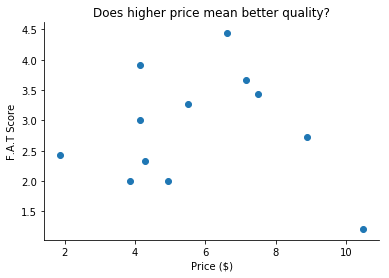

In [4]:
my_plt = plt.subplot(111)
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
my_plt.scatter(price,score)
plt.xlabel('Price ($)')
plt.ylabel('F.A.T Score')
plt.title('Does higher price mean better quality?')
plt.show()

In [5]:
price.corr(score)

-0.08246384728682529

In [6]:
price[:-1].corr(score[:-1])

0.39976928723510907

In [7]:
from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

A,B = curve_fit(f, price, score)[0] # your data x, y to fit

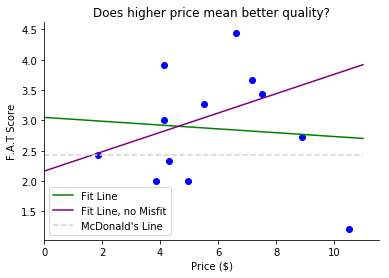

In [8]:
A,B = curve_fit(f, price, score)[0] # your data x, y to fit
A2,B2 = curve_fit(f, price[:-1], score[:-1])[0] # your data x, y to fit
x_lin = np.linspace(0,max(price)+0.5,100)

my_plt = plt.subplot(111)
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
my_plt.scatter(price,score, color='blue', label=None)
my_plt.plot(x_lin,f(x_lin,A,B),color='green',label='Fit Line')
my_plt.plot(x_lin,f(x_lin,A2,B2),color='purple',label='Fit Line, no Misfit')
my_plt.plot([0,max(price)+0.5],[2.43,2.43],color='lightgrey',
            label='McDonald\'s Line',linestyle='--')
plt.xlabel('Price ($)')
plt.xlim(xmin=0)
plt.ylabel('F.A.T Score')
plt.title('Does higher price mean better quality?')
plt.legend()
plt.show()

In [9]:
starch_pd['Bang4Buck'] = starch_pd.TOTAL / starch_pd.Price

In [10]:
frugal_pd = starch_pd.sort_values('Bang4Buck',ascending=False)[['Real Names','Bang4Buck']]

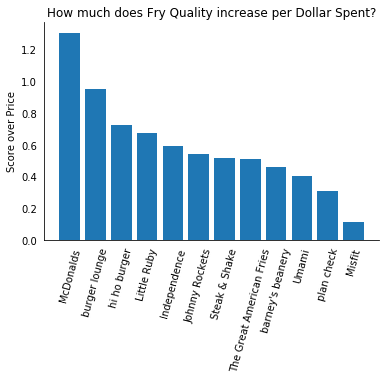

In [11]:
my_plt = plt.subplot(111)
my_plt.bar(frugal_pd['Real Names'],frugal_pd.Bang4Buck)
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
plt.xticks(rotation=75)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.title('How much does Fry Quality increase per Dollar Spent?')
plt.ylabel('Score over Price')
plt.show()

In [12]:
frugal_pd.head()

,Real Names,Bang4Buck
7,McDonalds,1.306452
1,burger lounge,0.949153
5,hi ho burger,0.726392
0,Little Ruby,0.671710
4,Independence,0.593466


In [13]:
(1.307 - 0.949)/0.949

0.3772391991570074

In [14]:
def expf(x, A, C, D): # exp line f(x)
    return A*np.exp(-D*x)+D

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


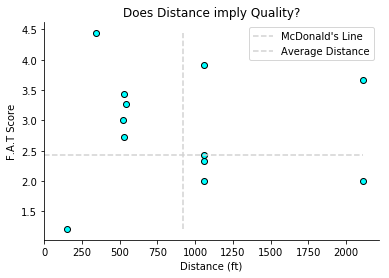

In [15]:
distance = starch_pd.Distance

A,B = curve_fit(f, distance, score)[0] 
A2,B2 = curve_fit(f, distance[:-1], score[:-1])[0] 
A3,C3,D3 = curve_fit(expf, distance[:-1], score[:-1])[0] 
x_lin = np.linspace(0,max(distance)+0.5,100)


my_plt = plt.subplot(111)
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
my_plt.scatter(distance,score, color='aqua',edgecolors='black',label=None)
# my_plt.plot(x_lin,f(x_lin,A,B),color='green',label='Fit Line')
# my_plt.plot(x_lin,expf(x_lin,A2,C2,D2),color='purple',label='Fit Line, no Misfit')
my_plt.plot([0,max(distance)+0.5],[2.43,2.43],color='lightgrey',
            label='McDonald\'s Line',linestyle='--')
my_plt.plot([np.mean(distance),np.mean(distance)],[min(score),max(score)],color='lightgrey',
            label='Average Distance',linestyle='--')
plt.xlabel('Distance (ft)')
plt.xlim(xmin=0)
plt.ylabel('F.A.T Score')
plt.title('Does Distance imply Quality?')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import r2_score

r2_score(score[:-1],f(distance[:-1],A2,B2)), A2

(0.10164205188017617, -0.00041581072717498203)

In [17]:
from scipy.stats import ttest_ind

In [18]:
comedy = starch_pd[starch_pd['Comedy?'] == 1].TOTAL.values
serious = starch_pd[starch_pd['Comedy?'] == 0].TOTAL.values

In [19]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(comedy, serious)

In [20]:
pvalue

0.529054428327496

In [21]:
hot = starch_pd[starch_pd.Temp > 60].TOTAL.values
col = starch_pd[starch_pd.Temp <= 60].TOTAL.values

In [22]:
len(hot),len(col)

(6, 6)

In [23]:
stat, pvalue = ttest_ind(hot, col)

In [24]:
pvalue

0.7496965512815397

In [25]:
fri = starch_pd[starch_pd.DoW == 'Fri'].TOTAL.values
non_fri = starch_pd[starch_pd.DoW != 'Fri'].TOTAL.values

In [26]:
stat, pvalue = ttest_ind(fri, non_fri)

In [27]:
pvalue

0.550657787491875

In [28]:
yelp = starch_pd.Yelp

In [29]:
starch_pd.loc[:starch_pd.shape[0]-2]

,Real Names,Fake Names,Flavor,Appearance,Texture,TOTAL,Price,Date,Temp,DoW,Comedy?,Distance,Yelp,Bang4Buck
0,Little Ruby,Los Pollos Hermanos (Breaking Bad),4.66,4.50,4.16,4.44,6.61,2019-02-19,60,Tues,0,341.2,4.0,0.671710
1,burger lounge,Paddy's Irish Pub (It's Always Sunny in Philad...,3.92,3.92,3.92,3.92,4.13,2019-03-07,61,Thurs,1,1056.0,4.0,0.949153
2,The Great American Fries,The Leaky Cauldron (Harry Potter),3.86,3.29,3.86,3.67,7.17,2019-02-25,64,Mon,0,2112.0,4.5,0.511855
3,barney's beanery,Mos Eisley Cantina (Star Wars),3.42,3.57,3.29,3.43,7.50,2019-02-25,64,Mon,0,528.0,3.0,0.457333
4,Independence,Freddy's BBQ Joint (House of Cards),2.83,3.83,3.16,3.27,5.51,2019-02-19,60,Tues,0,540.0,4.0,0.593466
5,hi ho burger,Krusty Krab (Spongebob),3.66,3.00,2.33,3.00,4.13,2019-02-09,58,Fri,1,520.0,4.5,0.726392
6,plan check,Bob's Burgers (Bob's Burgers),3.16,2.83,2.16,2.72,8.88,2019-02-09,58,Fri,1,528.0,4.0,0.306306
7,McDonalds,JJ's Diner (Parks and Recreation),2.43,2.43,2.43,2.43,1.86,2019-03-07,61,Thurs,1,1056.0,2.5,1.306452
8,Johnny Rockets,Dorsia (American Psycho),2.16,2.83,2.00,2.33,4.29,2019-02-19,60,Tues,0,1056.0,2.0,0.543124
9,Umami,Jack Rabbit Slims (Pulp Fiction),1.86,2.43,1.71,2.00,4.95,2019-02-25,64,Mon,0,2112.0,4.0,0.404040


In [30]:
yelp_agg = starch_pd.groupby('Yelp').TOTAL.mean().values
yelp_agg2 = starch_pd.loc[:starch_pd.shape[0]-2].groupby('Yelp').TOTAL.mean().values

In [42]:
yelp_scores = np.unique(starch_pd.Yelp.values)

In [66]:
scores = list(yelp_scores)
scores.insert(0,1.5)
scores.append(5)

In [67]:
scores

[1.5, 2.0, 2.5, 3.0, 4.0, 4.5, 5]

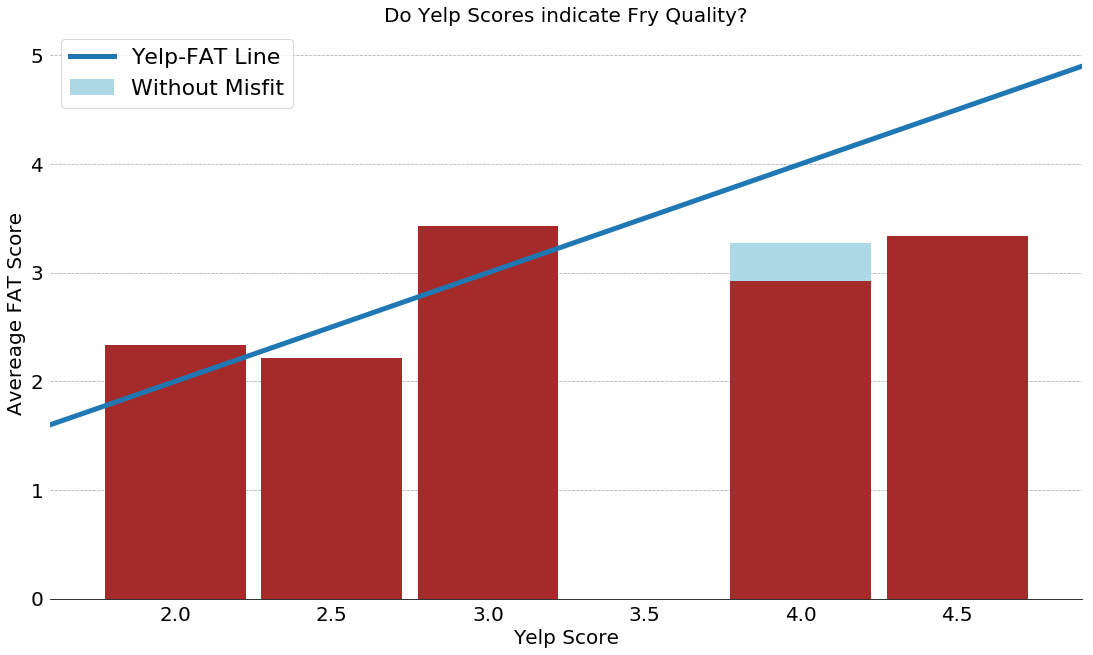

In [72]:
my_plt = plt.subplot(111)
plt.gcf().set_size_inches(18.5, 10.5)
plt.gca().yaxis.grid(True, linestyle='--')
my_plt.set_axisbelow(True)
my_plt.spines['right'].set_visible(False)
my_plt.spines['top'].set_visible(False)
my_plt.spines['left'].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
my_plt.bar(yelp_scores, yelp_agg2,width=0.45,color='lightblue',label='Without Misfit')
my_plt.bar(yelp_scores, yelp_agg,width=0.45,color='brown')
my_plt.plot(scores,scores,label='Yelp-FAT Line',linewidth=5)
plt.xlabel('Yelp Score')
plt.ylabel('Avereage FAT Score')
plt.title('Do Yelp Scores indicate Fry Quality?')
plt.xlim([1.6,4.9])
plt.legend(prop={'size': 22})
for item in ([my_plt.title, my_plt.xaxis.label, my_plt.yaxis.label] +
             my_plt.get_xticklabels() + my_plt.get_yticklabels()):
    item.set_fontsize(20)
plt.savefig('yelp_score.png')
# plt.show()


<Figure size 1332x756 with 0 Axes>

In [192]:
np.insert(yelp_scores,0,1.5)

array([1. , 2. , 2.5, 3. , 4. , 4.5])

In [197]:
scores = np.insert(np.insert(yelp_scores,yelp_scores.shape[0],5.0),0,1.5)

In [198]:
scores

array([1.5, 2. , 2.5, 3. , 4. , 4.5, 5. ])